/Users/giovanni/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`


test/brick3.jpg


/Users/giovanni/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`


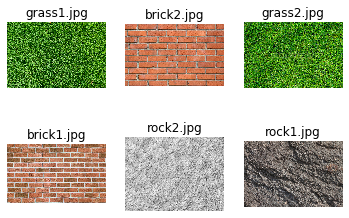

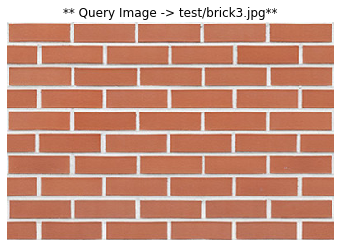

test/.DS_Store
test/grass3.jpg


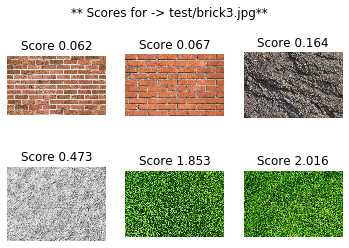

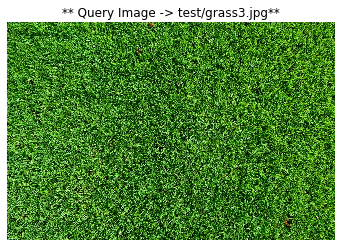

test/rock3.jpg


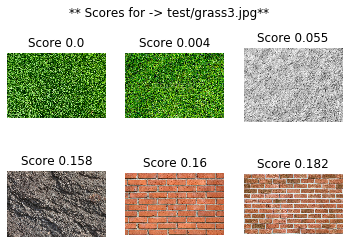

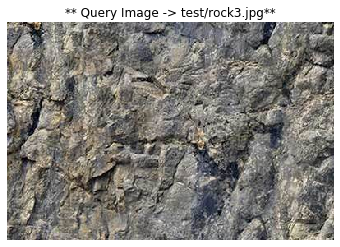

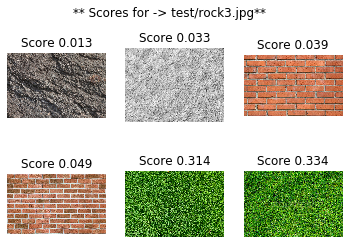

In [2]:
# OpenCV bindings
import cv2
# To performing path manipulations 
import os
import numpy as np
import matplotlib.pyplot as plt
# Local Binary Pattern function
from skimage.feature import local_binary_pattern
# To calculate a normalized histogram 
from scipy.stats import itemfreq
from sklearn.preprocessing import normalize
# Utility package -- use pip install cvutils to install
import cvutils
# To read class from file
import csv

# Store the path of training images in train_images
train_images = cvutils.imlist("train/")
# Dictionary containing image paths as keys and corresponding label as value
train_dic = {}
with open('class_train.txt', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        train_dic[row[0]] = int(row[1])


# List for storing the LBP Histograms, address of images and the corresponding label 
X_test = []
X_name = []
y_test = []

# For each image in the training set calculate the LBP histogram
# and update X_test, X_name and y_test
for train_image in train_images:
    if train_image != "train/.DS_Store":
        im = cv2.imread(train_image)
        # Convert to grayscale as LBP works on grayscale image
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        radius = 3
        # Number of points to be considered as neighbourers 
        no_points = 8 * radius
        # Uniform LBP is used
        lbp = local_binary_pattern(im_gray, no_points, radius, method='uniform')
        # Calculate the histogram
        x = itemfreq(lbp.ravel())
        # Normalize the histogram
        hist = x[:, 1]/sum(x[:, 1])
        # Append image path in X_name
        X_name.append(train_image)
        # Append histogram to X_name
        X_test.append(hist)
        # Append class label in y_test
        y_test.append(train_dic[os.path.split(train_image)[1]])
    
# Display the training images
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows,ncols)
for row in range(nrows):
    for col in range(ncols):
        axes[row][col].imshow(cv2.cvtColor(cv2.imread(X_name[row*ncols+col]), cv2.COLOR_BGR2RGB))
        axes[row][col].axis('off')
        axes[row][col].set_title("{}".format(os.path.split(X_name[row*ncols+col])[1]))


# Store the path of testing images in test_images
test_images = cvutils.imlist("test/")
# Dictionary containing image paths as keys and corresponding label as value

for test_image in test_images:
    print(test_image)
    if test_image != "test/.DS_Store":
        im = cv2.imread(test_image)
        # Convert to grayscale as LBP works on grayscale image
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        radius = 3
        # Number of points to be considered as neighbourers 
        no_points = 8 * radius
        # Uniform LBP is used
        lbp = local_binary_pattern(im_gray, no_points, radius, method='uniform')
        # Calculate the histogram
        x = itemfreq(lbp.ravel())
        # Normalize the histogram
        hist = x[:, 1]/sum(x[:, 1])
        # Display the query image
        cvutils.imshow("** Query Image -> {}**".format(test_image), im)
        results = []
        # For each image in the training dataset
        # Calculate the chi-squared distance and the sort the values
        for index, x in enumerate(X_test):
            score = cv2.compareHist(np.array(x, dtype=np.float32), np.array(hist, dtype=np.float32), cv2.HISTCMP_CHISQR)
            results.append((X_name[index], round(score, 3)))
        results = sorted(results, key=lambda score: score[1])
        # Display the results
        nrows = 2
        ncols = 3
        fig, axes = plt.subplots(nrows,ncols)
        fig.suptitle("** Scores for -> {}**".format(test_image))
        for row in range(nrows):
            for col in range(ncols):
                axes[row][col].imshow(cv2.cvtColor(cv2.imread(results[row*ncols+col][0]), cv2.COLOR_BGR2RGB))
                axes[row][col].axis('off')
                axes[row][col].set_title("Score {}".format(results[row*ncols+col][1]))